# Plot Gas Prices

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from IPython.display import display

sns.set_style("whitegrid")

In [2]:
countries = pd.read_excel("./data/gPrices.xlsx", sheet_name='countries', header=None)
prices = pd.read_excel("./data/gPrices.xlsx", sheet_name='prices', header=None)
Year = pd.to_datetime(pd.read_excel("./data/gPrices.xlsx", sheet_name='Year', header=None, dtype=str)[0])

In [3]:
def on_change(widget):
    x = widget['new'] 

country = widgets.Text( value='Australia',
                        placeholder='Type a country',
                        description='country',
                        disabled=False)

country.observe(on_change, names='value')
display(country)

Text(value='Australia', description='country', placeholder='Type a country')

In [4]:
try:
    idx = countries.T[0].to_list().index(country.value)
    country_prices = prices.iloc[:, idx]
except:
    idx = None

In [5]:
if idx == None:
    error_message = "No data available for " + country.value + "."
    raise Exception(error_message)
elif country_prices.isna().any():
    warning_message = "Missing values in price data for " + country.value + "."
    print(Warning(warning_message))

Missing values in price data for Australia.


When we ask for user input, we may want to communicate information to the user based on the input they provided. We will use an if-elseif statement to notify the user if they selected an invalid country or if the selected country has missing data. We can change the input to Australia and run the script and see a plot of the Australian gas prices. However, there is a missing value, NaN, in the prices. It would be good to issue a warning message to the user if there is any missing data in the plot.

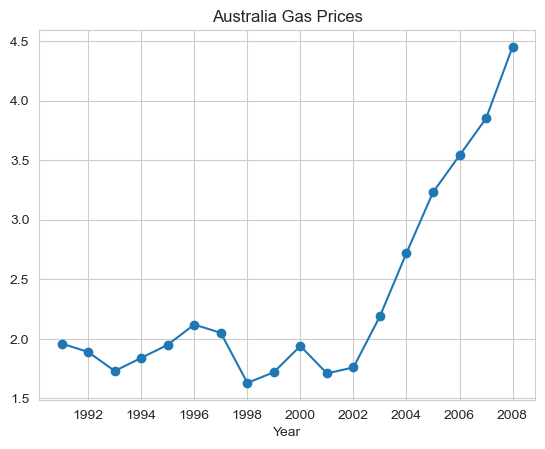

In [6]:
plt.figure()
plt.plot(Year, country_prices, marker='o')
plt.xlabel("Year")
plt.title(country.value + " Gas Prices")
plt.show()